In [1]:
# ===================================================================
#                          METADATA
# ===================================================================

# -------------------- General Information --------------------------
# 1. Title: Figure Script
# 2. Description: Script to reproduce Figure SI 1 in the article
# "Ionic Liquid--Electrode Interface: from One Law To Fit Them All to One Model To Predict Them All".
# 3. Authors:
#    - Ba Long Nguyen (ORCID: 0009-0003-7682-9851)
#    - Vladislav Ivanistsev (ORCID: 0000-0003-4517-0540)
# 4. Contact: balongn99@gmail.com & vladislav.ivanistsev@gmail.com
# 5. Keywords: differential capacitance, ionic liquids, modelling, fitting.

# -------------------- Identifiers & Versioning ---------------------
# 6. Version: 1.0.0
# 7. Date: 
#    - Created: 2025-06-13
#    - Last Modified: 2025-09-24
# 8. DOI: https://doi.org/10.1016/j.elecom.2025.108049

# -------------------- Usage & Accessibility ------------------------
# 10. License: This work is licensed under the MIT License.
# 11. Dependencies:
#     - Python 3.8+
#     - See 'requirements.txt' for necessary libraries (e.g., numpy, pandas, scipy, matplotlib).
# 13. Data Format:
#     - Units: Potential (V), Capacitance (μF/cm²), Surface Charge Density (μC/cm²)

In [2]:
from cycler import cycler
from scipy.integrate import quad
from scipy.ndimage import gaussian_filter1d

import numdifftools as nd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [3]:
l = 8.25/2.54 # inches
plt.rc('figure',figsize=(l,l)) # figure size
plt.rc('figure',      dpi=600) # figure dpi
plt.rc('lines',  linewidth=1)  # linewidth
plt.rc('font',        size=10) # fontsize of the text
plt.rc('font', family='sans-serif') # font family
plt.rc('axes',   titlesize=10) # fontsize of the axes title
plt.rc('axes',   labelsize=9)  # fontsize of the x and y labels
plt.rc('xtick',  labelsize=8)  # fontsize of the tick labels
plt.rc('ytick',  labelsize=8)  # fontsize of the tick labels
plt.rc('legend', fontsize =8)  # fontsize of the legend
plt.rc('figure', titlesize=10) # fontsize of the figure title

In [7]:
# ──────────────────── POWER-LAW MODEL ────────────────────
EXCLUDE = np.nan
def a(u, u_M, s_M, k1, k2):
    expo = k1 + (1 - k1) * np.exp(-k2 * u / u_M)
    if s_M > 0:                         # only right half-plane allowed
        expo = np.where(u >= 0, expo, EXCLUDE)
    else:                               # only left half-plane allowed
        expo = np.where(u <= 0, expo, EXCLUDE)
    return expo
      
def s(u, u_M, s_M, k1, k2): 
  return s_M * abs(u / u_M)**a(u, u_M, s_M, k1, k2)

def s_wrapper(x, *args, **kwargs):
    return s(x, *args)

def C(u, u_M, s_M, k1, k2):
  derivative = nd.Derivative(s_wrapper, step=1e-12)
  return derivative(u, u_M, s_M, k1, k2)

In [5]:
# ──────────────────── DATASETS ────────────────────
data_LCrMAr = {
  'Q': np.array( [-36.  , -32.  , -30.  , -28.  , -26.  , -24.  , -22.  , -20.  , -19.  ,
 -18.  , -17.  , -16.  , -15.  , -14.  , -13.  , -12.  , -10.  ,  -8.  ,
  -6.  ,  -5.  ,  -4.5 ,  -4.  ,  -3.5 ,  -3.  ,  -2.5 ,  -2.  ,  -1.5 ,
  -1.  ,  -0.5 ,  -0.25,   0.  ,   0.25,   0.5 ,   1.  ,   1.5 ,   2.  ,
   2.5 ,   3.  ,   3.5 ,   4.  ,   4.5 ,   5.  ,   6.  ,   8.  ,  10.  ,
  12.  ,  13.  ,  14.  ,  15.  ,  16.  ,  17.  ,  18.  ,  19.  ,  20.  ,
  22.  ,  24.  ,  26.  ,  28.  ,  30.  ,  32.  ,  36.  ] ),
  'U': np.array( [-17.77787358, -15.05145359, -13.7418511 , -12.4697356 , -11.23659809,
 -10.04410656,  -8.89414331,  -7.78885421,  -7.25372101,  -6.73071524,
  -6.22021312,  -5.72262511,  -5.23840135,  -4.76803835,  -4.31208741,
  -3.87116527,  -3.03728873,  -2.2733033 ,  -1.5887285 ,  -1.33755603,
  -1.19082486,  -1.05757416,  -0.92841827,  -0.78367518,  -0.66429409,
  -0.53239152,  -0.41019812,  -0.28304792,  -0.14751724,  -0.0795123 ,
   0.        ,   0.06237433,   0.12131692,   0.22195643,   0.30622031,
   0.37369298,   0.46491487,   0.540774  ,   0.63043964,   0.7264718 ,
   0.8149609 ,   0.91713738,   1.11750276,   1.51156245,   1.9643997 ,
   2.48321079,   2.75653958,   3.03856559,   3.32891427,   3.62725153,
   3.93327702,   4.24671896,   4.5673299 ,   4.89488345,   5.57000158,
   6.27058846,   6.99536051,   7.74319454,   8.51309739,   9.30418314,
  10.94679343] ),
  'C': np.array( [1.47331288, 1.50854311, 1.55372112, 1.60458302, 1.6590207 , 1.71589928,
 1.77371212, 1.83056316, 1.88530549, 1.93847851, 1.99223669, 2.04988118,
 2.11654372, 2.20135999, 2.31905972, 2.48625466, 2.70916719, 2.96977417,
 3.22712632, 3.44023516, 3.59307225, 3.69724601, 3.77363454, 3.83354798,
 3.87337044, 3.88246872, 3.85744684, 3.8151019 , 3.7971453 , 3.86113416,
 4.05849361, 4.40800382, 4.87483016, 5.36732917, 5.76627644, 5.98186524,
 5.99826142, 5.86790874, 5.66662126, 5.45089275, 5.24167502, 5.03085923,
 4.79853291, 4.53351646, 4.24812124, 3.97450119, 3.74349049, 3.56612318,
 3.43360735, 3.32979454, 3.24118584, 3.15908969, 3.07793363, 2.99427021,
 2.90722509, 2.81854462, 2.73113194, 2.647302  , 2.56882257, 2.49899593,
 2.4444802 ] )
}

data_LCrMArcor = {
  'Q': np.array( [-36.  , -32.  , -30.  , -28.  , -26.  , -24.  , -22.  , -20.  , -19.  ,
 -18.  , -17.  , -16.  , -15.  , -14.  , -13.  , -12.  , -10.  ,  -8.  ,
  -6.  ,  -5.  ,  -4.5 ,  -4.  ,  -3.5 ,  -3.  ,  -2.5 ,  -2.  ,  -1.5 ,
  -1.  ,  -0.5 ,  -0.25,   0.  ,   0.25,   0.5 ,   1.  ,   1.5 ,   2.  ,
   2.5 ,   3.  ,   3.5 ,   4.  ,   4.5 ,   5.  ,   6.  ,   8.  ,  10.  ,
  12.  ,  13.  ,  14.  ,  15.  ,  16.  ,  17.  ,  18.  ,  19.  ,  20.  ,
  22.  ,  24.  ,  26.  ,  28.  ,  30.  ,  32.  ,  36.  ] ),
'U': np.array( [-15.56908053, -13.12932373, -11.91339363, -10.70614653,  -9.47233971,
  -8.51453706,  -7.67811059,  -6.53170676,  -6.16525466,  -5.69668398,
  -5.11073323,  -4.65886627,  -4.32271866,  -3.86742806,  -3.45865197,
  -3.07642791,  -2.38330783,  -1.80521788,  -1.27011367,  -1.02696853,
  -0.91129611,  -0.80910417,  -0.71100703,  -0.59732269,  -0.50900034,
  -0.40815653,  -0.31702187,  -0.22093042,  -0.11645849,  -0.06398292,
   0.        ,   0.04684496,   0.09025817,   0.15983893,   0.21304407,
   0.24945799,   0.30962112,   0.35442151,   0.4130284 ,   0.47800181,
   0.53543216,   0.60654989,   0.74479777,   1.01462246,   1.3541714 ,
   1.72543325,   1.9894738 ,   2.18758001,   2.41374744,   2.63301749,
   2.87465907,   3.09791509,   3.36281862,   3.6087183 ,   4.16756636,
   4.7217413 ,   5.39579074,   6.0811936 ,   6.65586996,   7.3577622 ,
   8.76113268] ),
'C': np.array( [ 1.60854483,  1.63314666,  1.65867089,  1.73642282,  1.91496395,
  2.10771572,  2.24346946,  2.34749067,  2.30187288,  2.15416748,
  2.20453749,  2.43265956,  2.52522823,  2.49504013,  2.57450886,
  2.81970417,  3.18702209,  3.58742165,  3.95319595,  4.28422506,
  4.59711755,  4.8157797 ,  4.93056263,  5.08147536,  5.22267104,
  5.26287201,  5.20021296,  5.00992572,  4.76724711,  4.66986452,
  4.95173052,  5.6561133 ,  6.87747746,  8.7872893 , 10.59368753,
 11.02783117, 10.38141047,  9.53854176,  8.71460077,  8.18128035,
  7.79379661,  7.39402551,  7.05080865,  6.50088557,  5.65310524,
  4.90825998,  4.62449688,  4.59615034,  4.51349065,  4.39016613,
  4.27650756,  4.13653738,  3.9822718 ,  3.81942551,  3.5895078 ,
  3.32401886,  3.15478055,  3.13439921,  3.08934007,  2.97489234,
  2.92698221] )
}
# Create DataFrames
df_LCrMAr = pd.DataFrame(data_LCrMAr)
df_LCrMArcor = pd.DataFrame(data_LCrMArcor)

# Parameters for the anions and cations
params = {
    "MAr": {
        "s_M": 28, "u_M": 7.743195, 'k1': 0.762454,    'k2': 13.857427
    },
    "LCrM": {
        "s_M": -16, "u_M":  -5.722625, 'k1': 0.735736,    'k2': 6.269343
    },
    "MArcor": {
        "s_M": 28, "u_M": 6.08119, 'k1': 0.689303,    'k2': 21.735290
    },
    "LCrMcor": {
        "s_M": -16, "u_M":  -4.65887, 'k1': 0.708953,    'k2': 7.616908
    }
}

/home/ba-long/miniconda-fresh/envs/jlab/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1617: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,
/home/ba-long/miniconda-fresh/envs/jlab/lib/python3.12/site-packages/numdifftools/limits.py:150: UserWarning: All-NaN slice encountered
  warnings.warn(str(msg))
/tmp/ipykernel_11535/858398555.py:27: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(
/tmp/ipykernel_11535/858398555.py:30: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(


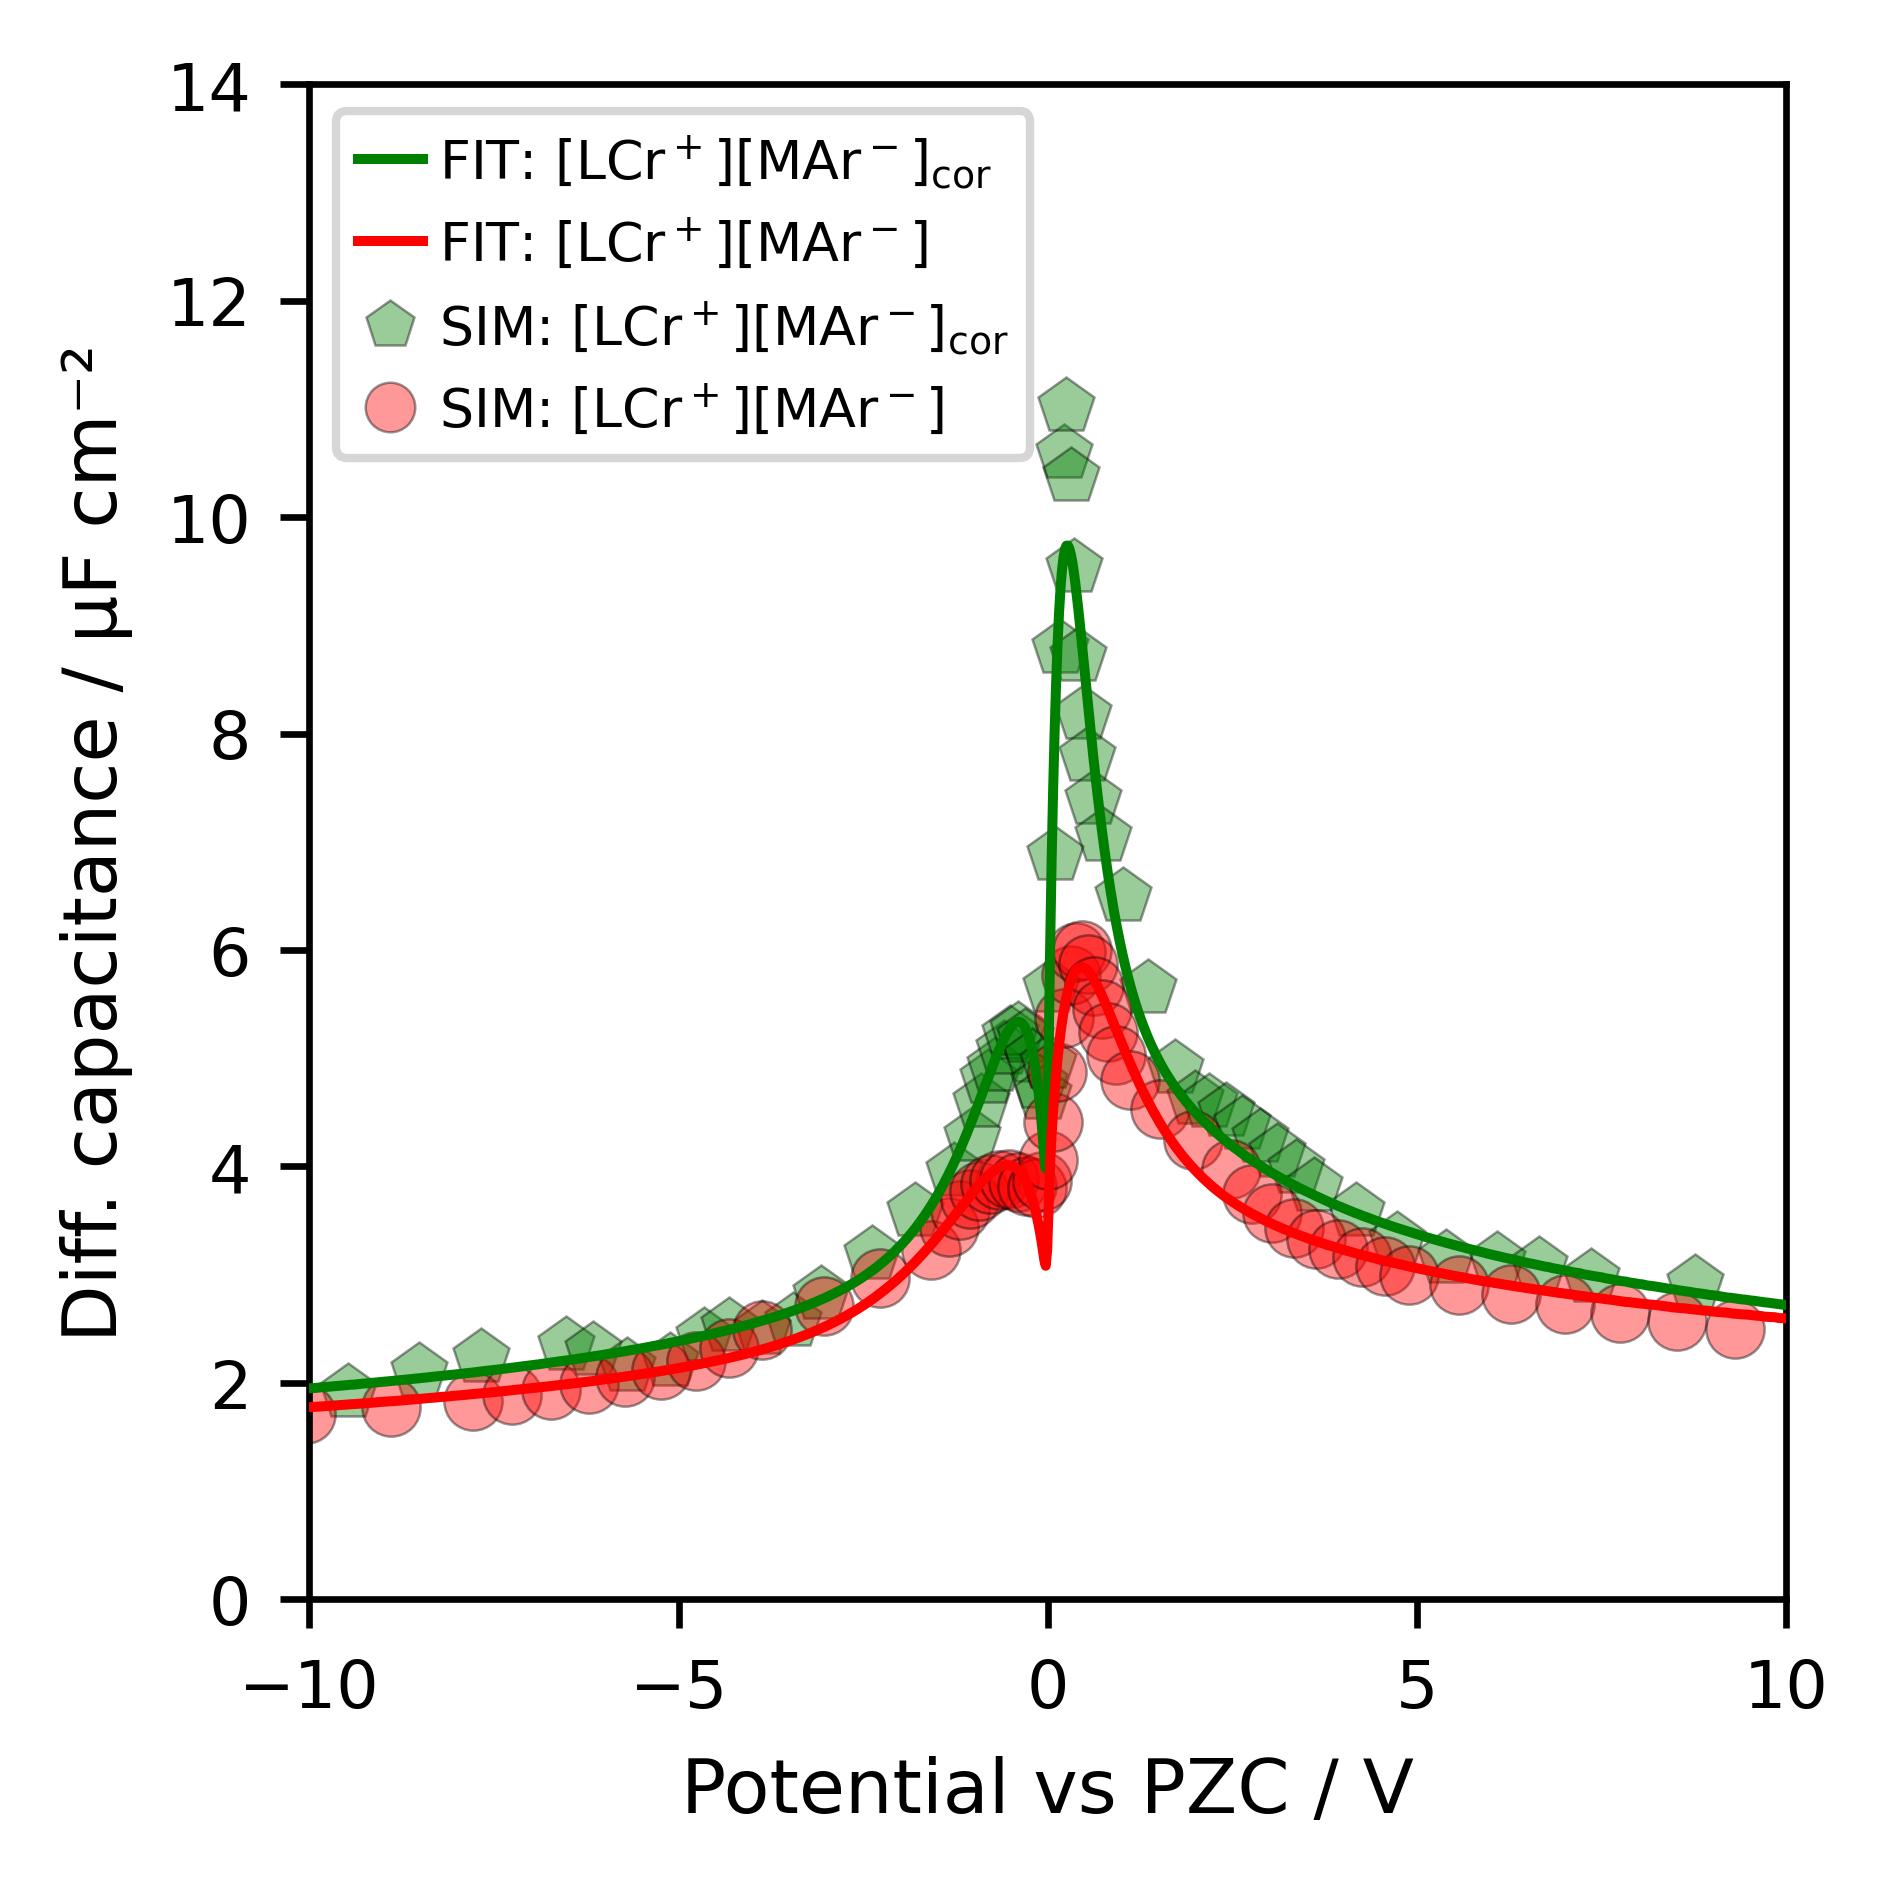

In [6]:
u_values = np.linspace(-10,10,1000)
C_values = {}

for ion, param in params.items():
    C_values[ion] = [C(u, param['u_M'], param['s_M'], param['k1'], param['k2']) for u in u_values]
  
joint_Cdata = {}

joint_Cdata["FIT: $\\mathrm{[LCr^+][MAr^-]_{cor}}$"] = np.concatenate((np.asarray(C_values['LCrMcor'])[~np.isnan(np.asarray(C_values['LCrMcor']))],
                                            np.asarray(C_values['MArcor'])[~np.isnan(np.asarray(C_values['MArcor']))]
                                           ))
joint_Cdata["FIT: $\\mathrm{[LCr^+][MAr^-]}$"] = np.concatenate((np.asarray(C_values['LCrM'])[~np.isnan(np.asarray(C_values['LCrM']))],
                                            np.asarray(C_values['MAr'])[~np.isnan(np.asarray(C_values['MAr']))]
                                           ))

for key in joint_Cdata:
    joint_Cdata[key] = gaussian_filter1d(joint_Cdata[key], sigma=1)
  
plt.figure()

for label, data in joint_Cdata.items():
    if '$\\mathrm{[LCr^+][MAr^-]_{cor}}$' in label:
        plt.plot(u_values, data, label=label, color='green', linewidth=1.2, zorder=5)
    if '$\\mathrm{[LCr^+][MAr^-]}$' in label:
        plt.plot(u_values, data, label=label, color='red', linewidth=1.2, zorder=5)

plt.errorbar(
    (df_LCrMArcor['U']), df_LCrMArcor['C'], fmt='o', color='green', label='SIM: $\\mathrm{[LCr^+][MAr^-]_{cor}}$', marker='p', markersize=7, markeredgecolor='black', markeredgewidth=0.3, alpha=0.4
)
plt.errorbar(
    (df_LCrMAr['U']), df_LCrMAr['C'], fmt='o', color='red', label='SIM: $\\mathrm{[LCr^+][MAr^-]}$', marker='o', markersize=7, markeredgecolor='black', markeredgewidth=0.3, alpha = 0.4
)

plt.xlabel('Potential vs PZC / V')
plt.ylabel('Diff. capacitance / μF cm⁻²')
plt.legend(fontsize=6.48, loc='upper left', markerscale=0.85, handlelength=1.2, handletextpad=0.3)
plt.xlim(-10, 10)
plt.ylim(0, 14)

plt.tight_layout()
# plt.savefig("Figure_SI1_MArcorrected.pdf", dpi=600, bbox_inches='tight')
plt.show()